In this notebook I am testing the results of the initial docking run. I made sure that all molecules are parsable and all results seem reasonable. There are 65 crashes which I am further investigating but besides that, everything looks fine!

In [25]:
import h5py
import json
import pandas as pd

pdb = '1rbp'

with h5py.File('h5_test/' + pdb + '.h5', 'r') as file:
    print(file.keys())
    print(file['poses'].keys())
    print(file['ligand_sdf'][()])
    print(json.loads(file['scfx_weights'][()]))
    print(json.loads(file['atmname_to_idx'][()]))
    data = file['poses']['results']
    names = file['poses']['row_names'].asstr()[()]
    headers = file['poses']['results'].attrs['column_names']
    df = pd.DataFrame(data, columns=headers)
    df.insert(loc=0, column='type', value=names)
df

<KeysViewHDF5 ['atmname_to_idx', 'ligand_sdf', 'pdb_strings', 'poses', 'protocol', 'results', 'scfx_weights']>
<KeysViewHDF5 ['pdb_strings', 'results', 'row_names']>
b'1rbp_ligand\n     RDKit          3D\n\n 51 51  0  0  1  0  0  0  0  0999 V2000\n   38.1220   17.7880   54.8970 O   0  0  0  0  0  0  0  0  0  0  0  0\n   33.8890   18.6090   54.1090 C   0  0  1  0  0  0  0  0  0  0  0  0\n   30.2950   19.1560   50.1160 C   0  0  1  0  0  0  0  0  0  0  0  0\n   31.7370   17.8970   45.0050 C   0  0  1  0  0  0  0  0  0  0  0  0\n   28.2410   21.4810   46.0260 C   0  0  1  0  0  0  0  0  0  0  0  0\n   30.4560   22.5970   45.6860 C   0  0  1  0  0  0  0  0  0  0  0  0\n   36.7580   18.0420   54.5870 C   0  0  1  0  0  0  0  0  0  0  0  0\n   33.2410   18.8890   51.2130 C   0  0  0  0  0  0  0  0  0  0  0  0\n   30.4050   20.8400   42.9870 C   0  0  1  0  0  0  0  0  0  0  0  0\n   36.2680   18.2380   53.2300 C   0  0  0  0  0  0  0  0  0  0  0  0\n   34.5270   18.6650   51.5950 C   0  0  0

,type,total_score,idelta_score,rmsd_to_crystal,rmsd_to_input,prepare_time,raw_fa_atr,raw_fa_rep,raw_fa_sol,raw_fa_intra_rep,...,raw_delta_atom_pair_constraint,raw_delta_coordinate_constraint,raw_delta_angle_constraint,raw_delta_dihedral_constraint,raw_delta_rama,raw_delta_omega,raw_delta_fa_dun,raw_delta_p_aa_pp,raw_delta_ref,raw_delta_chainbreak
0,crystal,-274.038422,-15.593081,0.000000e+00,0.0,0.112085,-851.997131,199.007477,540.369385,453.574615,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,relax,-274.038422,-15.593081,0.000000e+00,0.0,0.090486,-851.997131,199.007477,540.369385,453.574615,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,apo_relax,-258.445343,0.000000,1.201637e-13,0.0,0.090988,-825.305908,190.642532,536.256348,453.574615,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
%load_ext autoreload
%autoreload 2

In [ ]:
from data import PDBRinterface

results = PDBRinterface('h5_test')
res = results.get_result(pdb)

print(res.docking_pdb_updates[0])

res.docking_df

True
{'11': 'SSBOND     CYS A   70    CYS A  174                                       2.02  ', '342': 'ATOM    330  CG  PHE A  20      24.174  24.632  35.980  1.00  0.00           C  ', '343': 'ATOM    331  CD1 PHE A  20      24.948  23.878  36.841  1.00  0.00           C  ', '344': 'ATOM    332  CD2 PHE A  20      23.531  25.758  36.467  1.00  0.00           C  ', '345': 'ATOM    333  CE1 PHE A  20      25.060  24.264  38.174  1.00  0.00           C  ', '346': 'ATOM    334  CE2 PHE A  20      23.656  26.132  37.803  1.00  0.00           C  ', '347': 'ATOM    335  CZ  PHE A  20      24.424  25.380  38.661  1.00  0.00           C  ', '350': 'ATOM    338 1HB  PHE A  20      22.929  24.379  34.317  1.00  0.00           H  ', '351': 'ATOM    339 2HB  PHE A  20      24.225  23.172  34.483  1.00  0.00           H  ', '352': 'ATOM    340  HD1 PHE A  20      25.459  22.993  36.461  1.00  0.00           H  ', '353': 'ATOM    341  HD2 PHE A  20      22.921  26.355  35.788  1.00  0.00           

,type,total_score,idelta_score,rmsd_to_crystal,rmsd_to_input,prepare_time,raw_fa_atr,raw_fa_rep,raw_fa_sol,raw_fa_intra_rep,...,raw_delta_atom_pair_constraint,raw_delta_coordinate_constraint,raw_delta_angle_constraint,raw_delta_dihedral_constraint,raw_delta_rama,raw_delta_omega,raw_delta_fa_dun,raw_delta_p_aa_pp,raw_delta_ref,raw_delta_chainbreak
0,crystal_docking_perturb,-348.533508,-6.564925,9.408715,9.408715,3.073836,-857.898682,212.925583,541.177307,477.857819,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,relax_docking_perturb,-365.585449,-13.380249,2.579970,2.579970,2.867747,-854.474243,209.018570,537.251526,488.229034,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,apo_relax_docking_perturb,-350.768250,-11.111357,2.863228,2.863228,3.230778,-844.161743,178.668961,538.211731,482.222992,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
for key in results.results:
    res = results.get_result(key)
    print(len(res.relax_pdb[0].split('\n')), len(res.docking_pdb_updates[0]))

2871 1106
4766 707
4734 740
1545 613
4850 1095
5162 811
4842 935
4852 580
4848 682
4764 770


In [31]:
from tqdm import tqdm

failed_keys = []
half_finished = []
successful_keys = []
ideltas = []
rmsds = []
total_scores = []

for key in tqdm(results.results):
    try:
        pdb_entry = results.get_result(key)
    except:
        failed_keys.append(key)
        continue
    docking_df = pdb_entry.docking_df
    relax_df = pdb_entry.relax_df
    if 'apo_relax' not in relax_df.type.values:
        failed_keys.append(key)
        continue
    if 'apo_relax_docking_perturb' not in docking_df.type.values:
        half_finished.append(key)
        continue
    ideltas.append(docking_df.iloc[-1].idelta_score)
    rmsds.append(docking_df.iloc[-1].rmsd_to_input)
    total_scores.append(docking_df.iloc[-1].total_score)
    successful_keys.append(key)

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:00<00:00, 199.24it/s]


In [5]:
len(failed_keys)

47

In [6]:
len(half_finished)

18

In [7]:
import numpy as np

ideltas = np.array(ideltas)
rmsds = np.array(rmsds)
total_scores = np.array(total_scores)
successful_keys = np.array(successful_keys)

In [8]:
pos_ideltas = ideltas[ideltas > 0]
neg_ideltas = ideltas[ideltas <= 0]

print(len(pos_ideltas), len(neg_ideltas))

1063 10390


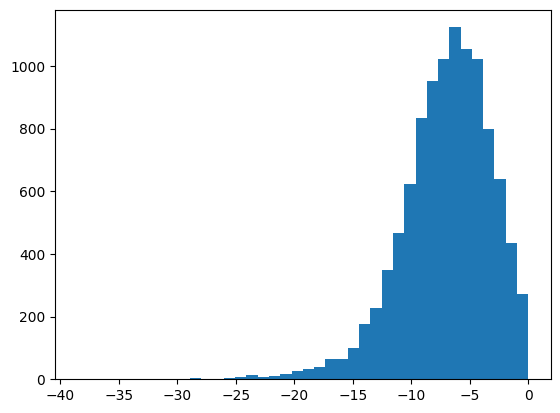

In [9]:
from matplotlib import pyplot as plt

plt.hist(neg_ideltas, bins=40)
plt.show()

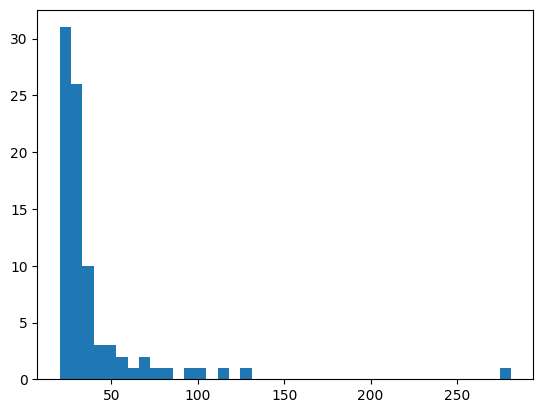

In [10]:
plt.hist(pos_ideltas[pos_ideltas > 20], bins=40)
plt.show()

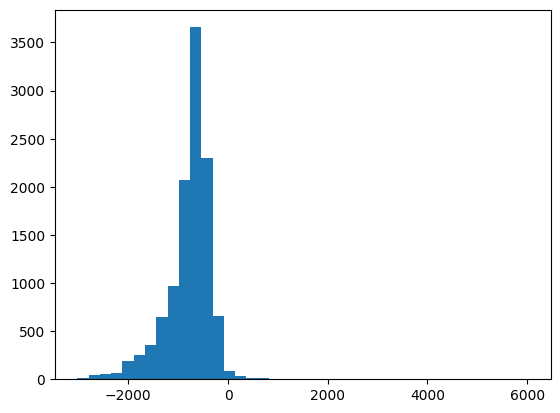

In [11]:
plt.hist(total_scores, bins=40)
plt.show()

In [12]:
len(total_scores[total_scores > 0])

125

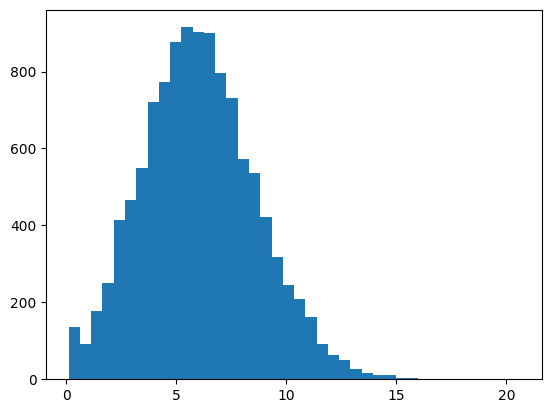

In [13]:
plt.hist(rmsds, bins=40)
plt.show()

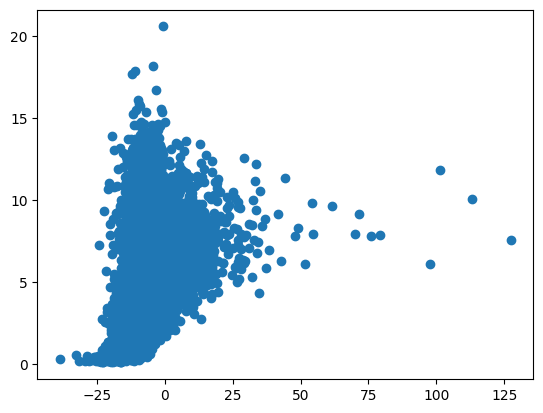

In [14]:
plt.scatter(ideltas[ideltas < 250], rmsds[ideltas < 250])
plt.show()

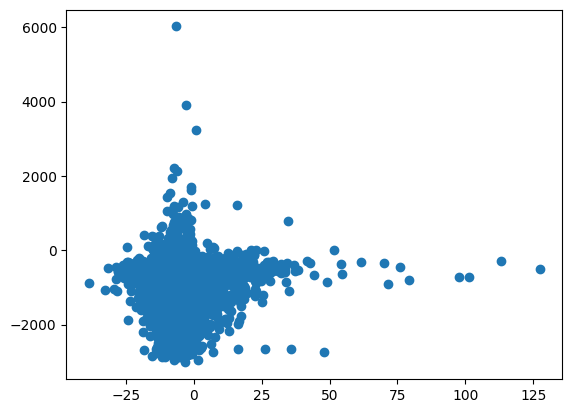

In [15]:
plt.scatter(ideltas[ideltas < 250], total_scores[ideltas < 250])
plt.show()

In [16]:
print(successful_keys[total_scores > 2500])
print(successful_keys[ideltas > 80])

['2ypi' '2a5c' '3ncq']
['3q4b' '5v82' '4nkt' '5igm' '2wf0']


In [17]:
for key in np.concatenate([successful_keys[total_scores > 2500], successful_keys[ideltas > 80]]):
    pdb_entry = results.get_result(key)
    pdb_entry.write_docked_pdb(-1, 'test_out/' + key + '.pdb')
    pdb_entry.write_docked_mol(-1, 'test_out/' + key + '.sdf')
    pdb_entry.write_relax_pdb(0, 'test_out/' + key + '_orig.pdb')
    pdb_entry.write_relaxed_mol(0, 'test_out/' + key + '_orig.sdf')

In [18]:
from rdkit import Chem

no_san_mol = []

for key in tqdm(results.results):
    try:
        try:
            pdb_entry = results.get_result(key)
        except:
            continue
        mol = pdb_entry.mol
        Chem.SanitizeMol(mol)
    except AttributeError:
        no_san_mol.append(key)

100%|██████████| 11518/11518 [01:23<00:00, 137.31it/s]


In [19]:
len(no_san_mol)

0

In [4]:
len(failed_keys)

47

In [1]:
failed_keys = ['3g2z',
 '4zzz',
 '3px8',
 '3b7u',
 '4hup',
 '3hb4',
 '3s3n',
 '3s3m',
 '2bdj',
 '1h46',
 '5d7x',
 '4oma',
 '4cik',
 '3pb9',
 '1sqi',
 '3px9',
 '4j5c',
 '3nzc',
 '3pb7',
 '4zzx',
 '3ej5',
 '3gws',
 '1tfz',
 '4j5e',
 '4hv7',
 '3ffp',
 '1xzx',
 '2r0u',
 '3pb8',
 '5n9l',
 '4yab',
 '6duk',
 '3kwb',
 '2a0c',
 '4j5d',
 '2o64',
 '4dai',
 '4mx5',
 '3g9l',
 '6a1c',
 '5hlp',
 '4huo',
 '6i3u',
 '2oo8',
 '2cct',
 '3fc1',
 '3g90']

In [2]:
half_finished = ['2y4s',
 '5mk9',
 '6g9b',
 '3ck8',
 '6f6n',
 '2zyn',
 '4yef',
 '6hro',
 '1dmb',
 '6g9i',
 '6f5u',
 '6f6i',
 '2j9n',
 '6f6s',
 '3fi2',
 '5ayf',
 '5mka',
 '6hs4']

In [8]:
import shutil
from pathlib import Path

# Define the directory to clean and the specific subdirectory name
base_dir = Path("pdbbind_cleaned")

remove_keys = failed_keys + half_finished
keep_keys = ['4yef', '3ck8', '5mk9', '1dmb', '2y4s', '2zyn', '5mka']
counter = 0
for key in remove_keys:
    if key in keep_keys: continue
    dir_to_remove = base_dir / key

    if dir_to_remove.exists() and dir_to_remove.is_dir():
        try:
            shutil.rmtree(dir_to_remove)
            print(f"Successfully removed: {dir_to_remove}")
            counter += 1
        except OSError as e:
            print(f"Error: {dir_to_remove} : {e.strerror}")
    else:
        print(f"Directory not found: {dir_to_remove}")

print("Total removes:", counter)


Directory not found: pdbbind_cleaned/3g2z
Directory not found: pdbbind_cleaned/4zzz
Directory not found: pdbbind_cleaned/3px8
Directory not found: pdbbind_cleaned/3b7u
Directory not found: pdbbind_cleaned/4hup
Directory not found: pdbbind_cleaned/3hb4
Directory not found: pdbbind_cleaned/3s3n
Directory not found: pdbbind_cleaned/3s3m
Directory not found: pdbbind_cleaned/2bdj
Directory not found: pdbbind_cleaned/1h46
Directory not found: pdbbind_cleaned/5d7x
Directory not found: pdbbind_cleaned/4oma
Directory not found: pdbbind_cleaned/4cik
Directory not found: pdbbind_cleaned/3pb9
Directory not found: pdbbind_cleaned/1sqi
Directory not found: pdbbind_cleaned/3px9
Directory not found: pdbbind_cleaned/4j5c
Directory not found: pdbbind_cleaned/3nzc
Directory not found: pdbbind_cleaned/3pb7
Directory not found: pdbbind_cleaned/4zzx
Directory not found: pdbbind_cleaned/3ej5
Directory not found: pdbbind_cleaned/3gws
Directory not found: pdbbind_cleaned/1tfz
Directory not found: pdbbind_clean

In [14]:
with open('pdbbind_cleaned/index.txt', "r") as f:
    lines = f.readlines()

len(lines)

11460

In [13]:
counter = 0
with open('pdbbind_cleaned/index.txt', "w") as f:
    for line in lines:
        key = line.split(';')[0]
        if key in remove_keys and key not in keep_keys:
            counter += 1
            continue
        f.write(line)
counter

58

In [32]:
from data import PDBRinterface

pdb = '1G9V_RQ3'

results = PDBRinterface('posebusters_paper_data/astex_h5/')
res = results.get_result(pdb)

print(res.docking_pdb_updates[0])

res.docking_df

{'20': 'ATOM      5  CB  VAL A   1      20.110  31.750  43.674  1.00  0.00           C  ', '21': 'ATOM      6  CG1 VAL A   1      21.099  32.867  43.375  1.00  0.00           C  ', '22': 'ATOM      7  CG2 VAL A   1      18.682  32.262  43.568  1.00  0.00           C  ', '27': 'ATOM     12  HB  VAL A   1      20.248  31.407  44.700  1.00  0.00           H  ', '28': 'ATOM     13 1HG1 VAL A   1      20.929  33.697  44.062  1.00  0.00           H  ', '29': 'ATOM     14 2HG1 VAL A   1      22.116  32.496  43.501  1.00  0.00           H  ', '30': 'ATOM     15 3HG1 VAL A   1      20.960  33.211  42.351  1.00  0.00           H  ', '31': 'ATOM     16 1HG2 VAL A   1      18.543  33.099  44.252  1.00  0.00           H  ', '32': 'ATOM     17 2HG2 VAL A   1      18.489  32.591  42.547  1.00  0.00           H  ', '33': 'ATOM     18 3HG2 VAL A   1      17.988  31.462  43.829  1.00  0.00           H  ', '536': 'ATOM    521  CG  PHE A  36      18.308   6.586  33.505  1.00  0.00           C  ', '537': '

,type,total_score,idelta_score,rmsd_to_crystal,rmsd_to_input,prepare_time,raw_fa_atr,raw_fa_rep,raw_fa_sol,raw_fa_intra_rep,...,raw_delta_atom_pair_constraint,raw_delta_coordinate_constraint,raw_delta_angle_constraint,raw_delta_dihedral_constraint,raw_delta_rama,raw_delta_omega,raw_delta_fa_dun,raw_delta_p_aa_pp,raw_delta_ref,raw_delta_chainbreak
0,crystal_docking_perturb,-1872.273804,-7.447002,4.022778,4.022778,2.145146,-3037.769043,775.310852,1738.970825,1123.967651,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,crystal_docking_perturb,-1900.225708,-7.261291,10.141772,10.141772,2.162614,-3048.679199,771.452820,1743.542725,1121.989258,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,crystal_docking_perturb,-1873.285645,-4.616005,5.706974,5.706974,1.736596,-3041.717285,774.384827,1738.650635,1131.291626,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,crystal_docking_perturb,-1863.216309,-2.532658,5.812755,5.812755,3.070084,-3054.726074,802.977844,1742.935669,1129.979858,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,crystal_docking_perturb,-1859.212036,-3.096691,7.970708,7.970708,3.823640,-3046.915527,781.496521,1743.189209,1145.410034,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,crystal_docking_perturb,-1889.352295,-8.408925,6.148862,6.148862,1.849384,-3050.812256,770.730896,1742.319336,1131.100342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,crystal_docking_perturb,-1873.150757,-6.335054,8.979039,8.979039,1.674863,-3038.923096,761.926025,1735.862549,1134.913818,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,crystal_docking_perturb,-1882.646729,-7.964437,3.308136,3.308136,2.127125,-3049.564941,779.846313,1741.557129,1133.088745,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,crystal_docking_perturb,-1878.999512,-4.475008,9.599078,9.599078,1.661469,-3043.880859,771.688904,1741.772339,1132.975342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,crystal_docking_perturb,-1875.536743,-6.293927,8.633840,8.633840,2.179989,-3034.886230,769.836975,1731.115967,1127.655884,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
res.write_relax_pdb(1, 'test.pdb')
res.write_relax_pdb(0, 'test2.pdb')